In [1]:
#mount Gooogle Drive in Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import some libraries 
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
#declare path to images
NUM_PLATES_DIR = '/content/drive/My Drive/HNGi6/plate_number/'
NEGATIVES_DIR = '/content/drive/My Drive/HNGi6/negative_images/'
#flatten images into 64x64 pixels and three channels
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
plates_images = [NUM_PLATES_DIR+i for i in os.listdir(NUM_PLATES_DIR)]
negative_images = [NEGATIVES_DIR+i for i in os.listdir(NEGATIVES_DIR)]

In [0]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower() :
      y[0,i] = 1
    elif 'image' in image_file.lower() :
      y[0,i] = 0
    
      
    if i%10 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [7]:
X_img, y_img = prep_data(plates_images + negative_images)


X.shape is (12288, 100)
Proceed 0 of 100
Proceed 10 of 100
Proceed 20 of 100
Proceed 30 of 100
Proceed 40 of 100
Proceed 50 of 100
Proceed 60 of 100
Proceed 70 of 100
Proceed 80 of 100
Proceed 90 of 100


In [8]:
print("Train shape: {}".format(X_img.shape))
print("Test shape: {}".format(y_img.shape))


Train shape: (12288, 100)
Test shape: (1, 100)


In [0]:
classes = {0: 'negative',
           1: 'number plate',
           }

In [0]:
from sklearn.linear_model import LogisticRegressionCV

In [0]:
clf = LogisticRegressionCV()

In [0]:
X_train_lr, y_train_lr = X_img.T, y_img.T.ravel()

In [13]:
clf.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
print("Model accuracy: {:.2f}%".format(clf.score(X_train_lr, y_train_lr)*100))

Model accuracy: 100.00%


In [0]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

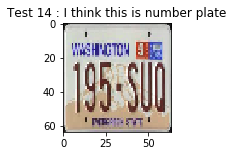

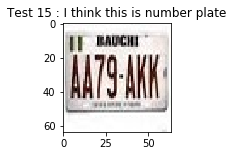

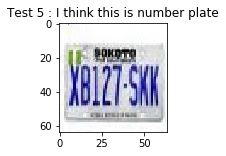

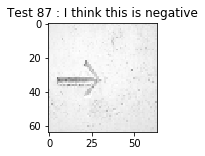

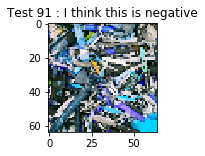

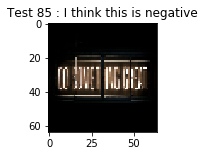

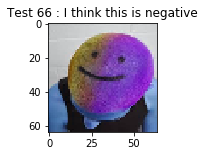

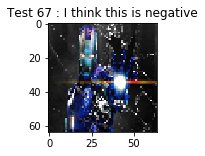

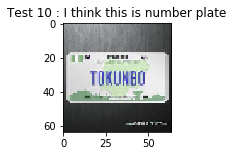

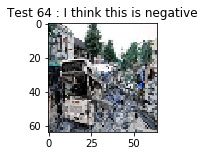

In [16]:
X_train_lr, y_train_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_train_lr), 10) :
  show_image_prediction(X_train_lr, i, clf)

In [17]:
'''#Use list comprehension to build a list of file-paths for images
NUM_PLATES_IMAGES = [NUM_PLATES_DIR+i for i in os.listdir(NUM_PLATES_DIR)]
NEGATIVES_IMAGES = [NEGATIVES_DIR+i for i in os.listdir(NEGATIVES_DIR)]

#some checks here
print(len(NUM_PLATES_IMAGES))
print(len(NEGATIVES_IMAGES))

#Seperate 80% of both list to build a list training images for the model
plates_train_images = NUM_PLATES_IMAGES[:int(len(NUM_PLATES_IMAGES)*0.8)]
negatives_train_images = NEGATIVES_IMAGES[:int(len(NEGATIVES_IMAGES)*0.8)]


#Distinguish them by naming the negatives "neg" and plate number "plate"
def rename_negative_files(image_list):
    mod_negatives= []
    for image_path in image_list:
        path = image_path.split('.')[0]+"neg." + image_path.split('.')[1]
        print (path)
        mod_negatives.append(path)
    return mod_negatives

def rename_plate_files(image_list):
    mod_plates= []
    for image_path in image_list:
        path = image_path.split('.')[0]+"plate." + image_path.split('.')[1]
        print (path)
        mod_plates.append(path)
    return mod_plates


#Combine the Plate Numbers and Negatives into a single list 
train_images = rename_plate_files(plates_train_images) + rename_negative_files(negatives_train_images)

#Seperate 20% of each set of images as test data and combine them for fitting
test_images = NUM_PLATES_IMAGES[int(len(NUM_PLATES_IMAGES)*0.8):] +NEGATIVES_IMAGES[int(len(NEGATIVES_IMAGES)*0.8):]'''

'#Use list comprehension to build a list of file-paths for images\nNUM_PLATES_IMAGES = [NUM_PLATES_DIR+i for i in os.listdir(NUM_PLATES_DIR)]\nNEGATIVES_IMAGES = [NEGATIVES_DIR+i for i in os.listdir(NEGATIVES_DIR)]\n\n#some checks here\nprint(len(NUM_PLATES_IMAGES))\nprint(len(NEGATIVES_IMAGES))\n\n#Seperate 80% of both list to build a list training images for the model\nplates_train_images = NUM_PLATES_IMAGES[:int(len(NUM_PLATES_IMAGES)*0.8)]\nnegatives_train_images = NEGATIVES_IMAGES[:int(len(NEGATIVES_IMAGES)*0.8)]\n\n\n#Distinguish them by naming the negatives "neg" and plate number "plate"\ndef rename_negative_files(image_list):\n    mod_negatives= []\n    for image_path in image_list:\n        path = image_path.split(\'.\')[0]+"neg." + image_path.split(\'.\')[1]\n        print (path)\n        mod_negatives.append(path)\n    return mod_negatives\n\ndef rename_plate_files(image_list):\n    mod_plates= []\n    for image_path in image_list:\n        path = image_path.split(\'.\')[0]+

In [18]:
'''def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()'''

'def show_images(X, y, idx) :\n  image = X[idx]\n  image = image.reshape((ROWS, COLS, CHANNELS))\n  plt.figure(figsize=(4,2))\n  plt.imshow(image)\n  plt.title("This is a {}".format(classes[y[idx,0]]))\n  plt.show()'

In [19]:
'''show_images(X_img.T, y_img.T, 1)'''

'show_images(X_img.T, y_img.T, 1)'